In [18]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Load your dataset (replace 'your_dataset.csv' with your file path)
df = pd.read_csv('/home/ikuseta/diplomski_projekt/autonomousGIS/STEPS/temp_lucas.csv')
pd.set_option('display.max_columns', None)
df

,Depth,POINTID,pH_CaCl₂,pH_H₂O,EC,OC,CaCO₃,P,N,K,OC (20–30 cm),CaCO₃ (20–30 cm),Ox_Al,Ox_Fe,NUTS_0,NUTS_1,NUTS_2,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC₀_Desc,LC₁_Desc,LU₁_Desc
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3.0,0.0,1.1,101.9,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.150238,16.134212,06-07-18,291,C23,U120,Woodland,Other coniferous woodland,Forestry
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1.0,0.0,1.3,51.2,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.274272,16.175359,06-07-18,373,C21,U120,Woodland,Spruce dominated coniferous woodland,Forestry
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1.0,12.3,3.1,114.8,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.123260,16.289693,02-06-18,246,C33,U120,Woodland,Other mixed woodland,Forestry
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3.0,0.0,2.0,165.8,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.245693,16.357506,06-07-18,305,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2.0,0.0,2.2,42.1,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.296372,16.416782,05-07-18,335,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18978,0-20 cm,32643634,6.0,6.13,91.40,51.4,2.0,92.2,5.3,1036.9,0.0,0.0,0.0,0.0,UK,UKN,UKN1,UKN11,54.713343,-6.563749,24-07-18,50,E20,U111,Grassland,Grassland without tree/shrub cover,Agriculture (excluding fallow land and kitchen...
18979,0-20 cm,32703676,4.9,5.14,51.78,73.9,0.0,81.6,6.9,225.0,0.0,0.0,0.0,0.0,UK,UKN,UKN1,UKN12,55.091488,-6.625119,02-08-18,34,B55,U111,Cropland,Temporary grassland,Agriculture (excluding fallow land and kitchen...
18980,0-20 cm,32783608,5.5,5.94,22.40,63.7,1.0,101.9,6.7,569.5,0.0,0.0,0.0,0.0,UK,UKN,UKN1,UKN14,54.515104,-6.259448,18-06-18,50,E20,U111,Grassland,Grassland without tree/shrub cover,Agriculture (excluding fallow land and kitchen...
18981,0-20 cm,32783636,5.3,5.90,10.42,38.3,1.0,7.3,3.1,1907.9,0.0,0.0,0.0,0.0,UK,UKN,UKN1,UKN13,54.759266,-6.358608,05-06-18,122,E20,U370,Grassland,Grassland without tree/shrub cover,Residential


In [20]:

# Create a GeoDataFrame from coordinates (TH_LAT and TH_LONG)
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['TH_LONG'], df['TH_LAT']),  # Longitude first, latitude second
    crs="EPSG:4326"  # Assuming coordinates are in WGS84 (latitude/longitude)
)

# Filter points where LC₀_Desc is 'Woodland'
woodland_points = gdf[gdf['LC₀_Desc'] == 'Woodland']

In [21]:
gdf.head()

,Depth,POINTID,pH_CaCl₂,pH_H₂O,EC,OC,CaCO₃,P,N,K,OC (20–30 cm),CaCO₃ (20–30 cm),Ox_Al,Ox_Fe,NUTS_0,NUTS_1,NUTS_2,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC₀_Desc,LC₁_Desc,LU₁_Desc,geometry
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3.0,0.0,1.1,101.9,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.150238,16.134212,06-07-18,291,C23,U120,Woodland,Other coniferous woodland,Forestry,POINT (16.13421 47.15024)
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1.0,0.0,1.3,51.2,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.274272,16.175359,06-07-18,373,C21,U120,Woodland,Spruce dominated coniferous woodland,Forestry,POINT (16.17536 47.27427)
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1.0,12.3,3.1,114.8,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.123260,16.289693,02-06-18,246,C33,U120,Woodland,Other mixed woodland,Forestry,POINT (16.28969 47.12326)
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3.0,0.0,2.0,165.8,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.245693,16.357506,06-07-18,305,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry,POINT (16.35751 47.24569)
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2.0,0.0,2.2,42.1,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.296372,16.416782,05-07-18,335,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry,POINT (16.41678 47.29637)


In [22]:
# Load the European coastline shapefile
europe_shapefile_path = '/home/ikuseta/diplomski_projekt/autonomousGIS/Europe/Europe_coastline.shp'
europe_shapefile = gpd.read_file(europe_shapefile_path)

# Check the CRS (Coordinate Reference System)
print(europe_shapefile.crs)

# Reproject the woodland points to match the coastline's CRS
woodland_points = woodland_points.to_crs(europe_shapefile.crs)
gdf = gdf.to_crs(europe_shapefile.crs)

EPSG:3035


In [23]:
woodland_points.head()

,Depth,POINTID,pH_CaCl₂,pH_H₂O,EC,OC,CaCO₃,P,N,K,OC (20–30 cm),CaCO₃ (20–30 cm),Ox_Al,Ox_Fe,NUTS_0,NUTS_1,NUTS_2,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC₀_Desc,LC₁_Desc,LU₁_Desc,geometry
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3.0,0.0,1.1,101.9,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.150238,16.134212,06-07-18,291,C23,U120,Woodland,Other coniferous woodland,Forestry,POINT (4786000 2690000)
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1.0,0.0,1.3,51.2,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.274272,16.175359,06-07-18,373,C21,U120,Woodland,Spruce dominated coniferous woodland,Forestry,POINT (4788000 2704000)
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1.0,12.3,3.1,114.8,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.123260,16.289693,02-06-18,246,C33,U120,Woodland,Other mixed woodland,Forestry,POINT (4798000 2688000)
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3.0,0.0,2.0,165.8,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.245693,16.357506,06-07-18,305,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry,POINT (4802000 2702000)
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2.0,0.0,2.2,42.1,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.296372,16.416782,05-07-18,335,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry,POINT (4806000 2708000)


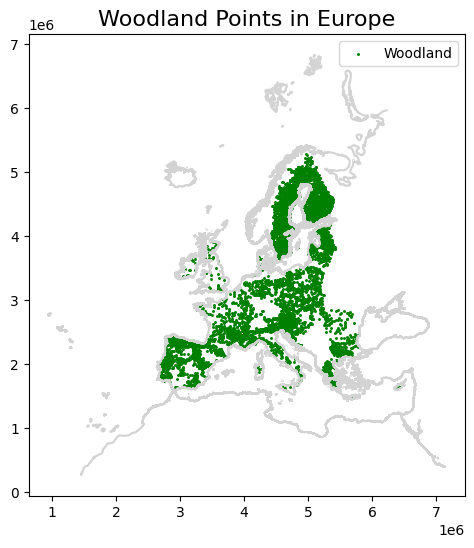

In [24]:
# Create a plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the European coastline
europe_shapefile.plot(ax=ax, color='lightgrey')

# Plot the Woodland points
woodland_points.plot(
    ax=ax, 
    marker='.', 
    color='green', 
    markersize=5, 
    label='Woodland'
    )

# Add title and legend
plt.title("Woodland Points in Europe", fontsize=16)
plt.legend()

# Save the plot
plt.savefig('woodland_points_in_europe.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [25]:
woodland_points

,Depth,POINTID,pH_CaCl₂,pH_H₂O,EC,OC,CaCO₃,P,N,K,OC (20–30 cm),CaCO₃ (20–30 cm),Ox_Al,Ox_Fe,NUTS_0,NUTS_1,NUTS_2,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC₀_Desc,LC₁_Desc,LU₁_Desc,geometry
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3.0,0.0,1.1,101.9,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.150238,16.134212,06-07-18,291,C23,U120,Woodland,Other coniferous woodland,Forestry,POINT (4786000 2690000)
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1.0,0.0,1.3,51.2,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.274272,16.175359,06-07-18,373,C21,U120,Woodland,Spruce dominated coniferous woodland,Forestry,POINT (4788000 2704000)
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1.0,12.3,3.1,114.8,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.123260,16.289693,02-06-18,246,C33,U120,Woodland,Other mixed woodland,Forestry,POINT (4798000 2688000)
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3.0,0.0,2.0,165.8,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.245693,16.357506,06-07-18,305,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry,POINT (4802000 2702000)
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2.0,0.0,2.2,42.1,0.0,0.0,0.0,0.0,AT,AT1,AT11,AT113,47.296372,16.416782,05-07-18,335,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry,POINT (4806000 2708000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18955,0-20 cm,33203610,5.6,6.16,54.30,86.0,1.0,135.3,8.3,1030.4,0.0,0.0,0.0,0.0,UK,UKN,UKN0,UKN09,54.615356,-5.631101,20-07-18,35,C10,U111,Woodland,Broadleaved woodland,Agriculture (excluding fallow land and kitchen...,POINT (3320000 3610000)
18956,0-20 cm,31743634,4.2,5.00,6.99,29.9,1.0,0.0,2.5,48.9,0.0,0.0,0.0,0.0,UK,UKN,UKN1,UKN16,54.521660,-7.921687,03-10-18,126,C21,U120,Woodland,Spruce dominated coniferous woodland,Forestry,POINT (3174000 3634000)
18960,0-20 cm,31923630,4.3,5.04,15.58,63.6,0.0,11.0,4.3,79.5,0.0,0.0,0.0,0.0,UK,UKN,UKN1,UKN16,54.526476,-7.635780,02-10-18,98,C10,U120,Woodland,Broadleaved woodland,Forestry,POINT (3192000 3630000)
18963,0-20 cm,32023608,3.2,4.29,25.90,504.6,0.0,195.7,19.7,625.3,0.0,0.0,0.0,0.0,UK,UKN,UKN1,UKN16,54.357146,-7.402597,25-09-18,77,C10,U420,Woodland,Broadleaved woodland,Semi-natural and natural areas not in use,POINT (3202000 3607999.999)


In [26]:
output_path = '/home/ikuseta/diplomski_projekt/autonomousGIS/geo_dataframe/geo_dataframe.shp'
gdf.to_file(output_path)

/tmp/ipykernel_3702333/3184574075.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_path)
/home/ikuseta/diplomski_projekt/dipl_pro_venv/lib/python3.9/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'OC (20–30 cm)' to 'OC (20–3'
  ogr_write(
/home/ikuseta/diplomski_projekt/dipl_pro_venv/lib/python3.9/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'CaCO₃ (20–30 cm)' to 'CaCO₃ (2'
  ogr_write(
/home/ikuseta/diplomski_projekt/dipl_pro_venv/lib/python3.9/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'SURVEY_DATE' to 'SURVEY_DAT'
  ogr_write(
